In [5]:
library (tidyverse)
library (repr)
library (tidymodels)
options (repr.matrix.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



Notebook 1

In [6]:
url_for_player <- "https://raw.githubusercontent.com/keziaannabel/DSCI100/refs/heads/main/players_37600949.csv"
players_url <- read_csv(url_for_player)
url_for_session <- "https://raw.githubusercontent.com/keziaannabel/DSCI100/refs/heads/main/sessions_37600952.csv"
session_url <- read_csv(url_for_session) 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# (1) Data Description

### Players

The player dataset contain informations about individual players on Minecraft, with a total of 196 observations and 7 variables, which are : 

1. experience(chr) : player's level of experience (Pro, Amateur, Beginner, Veteran, Regular)
2. subscribe(lgl) : (TRUE or False) stating whether the player subscribes to the server or not
3. hashedEmail(chr) : stating player's hashed email
4. played_hours(dbl) : the total hours player spend playing Minecraft
5. name(chr) : stating player's name
6. gender(chr) : player's gender
7. age(dbl) : player's age (in years)

chr = character, lgl = logical, dbl = double

variable 7 in the player dataset (age) has an issue, since they are double fields, they should contain a number, but instead 2 observations contain NA values.

### Session

The session dataset contain information about player's activity in the server, with 1535 observations and 5 variables. Those variables are : 

1. hashedEmail(chr) : containing player's hashed email
2. start_time(chr) : session's start time, recorded as date string and time
3. end_time(chr) : session's end time, recorded as date string and time
4. original_start_time(dbl) : timestamp corresponding to start_time
5. original_end_time(dbl) : timestamp corresponding to end_time

# (2) Question

The question that intrigued me the most and that i aim to answer is "Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?"

### Response variable :

The response variable is played_hours

This variable depends and affected by other variables. This variable is a direct measure of the player's contribution according to the amount of time they have spent on the server

### Explanatory variable :

The explanatory variables are : experience, subscribe, age, gender

Explanatory variables explain and influence changes in the response variable. 

## Data Wrangling Plan

First thing we need to do before we analyze and work ont he data is to make the data tidy, and in a structured format. So, the things i will do are : 

1. Filter and Select Columns
   - Filter all the missing values in the age variable.
   - Select the response and explanatory variables.
2. Convert Data Types
   - experience and gender should be categorical variables.
   - age and played_hours should also remain numeric.
3. Aggregate and Scale the Predictors
   - scale the predictors to prevent a bias to the larger predictors.

# (3) Exploratory Data Analysis and Visualisation

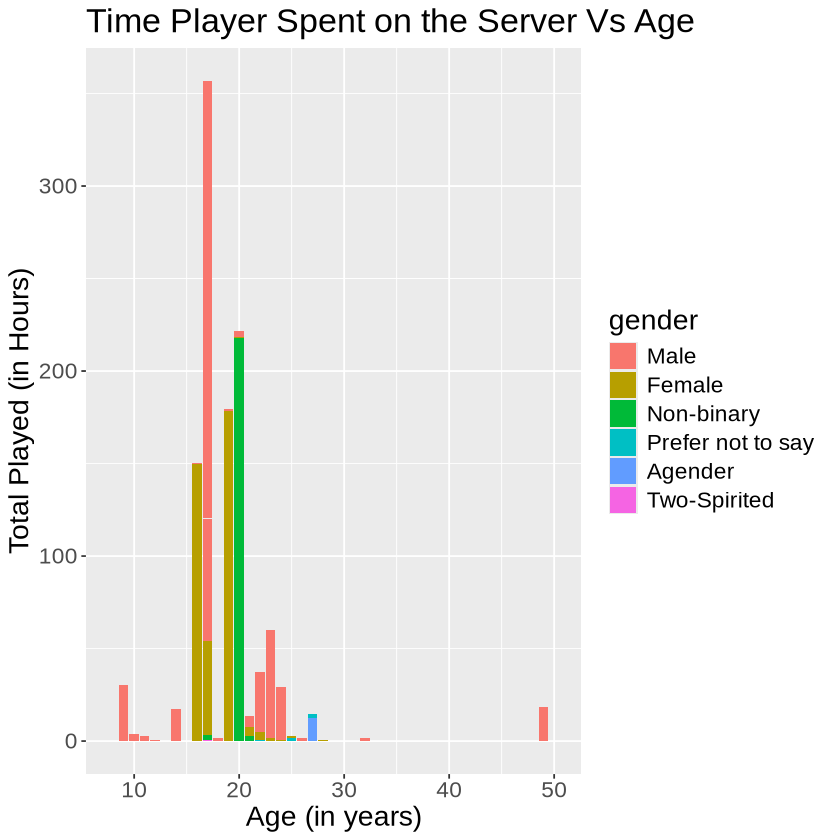

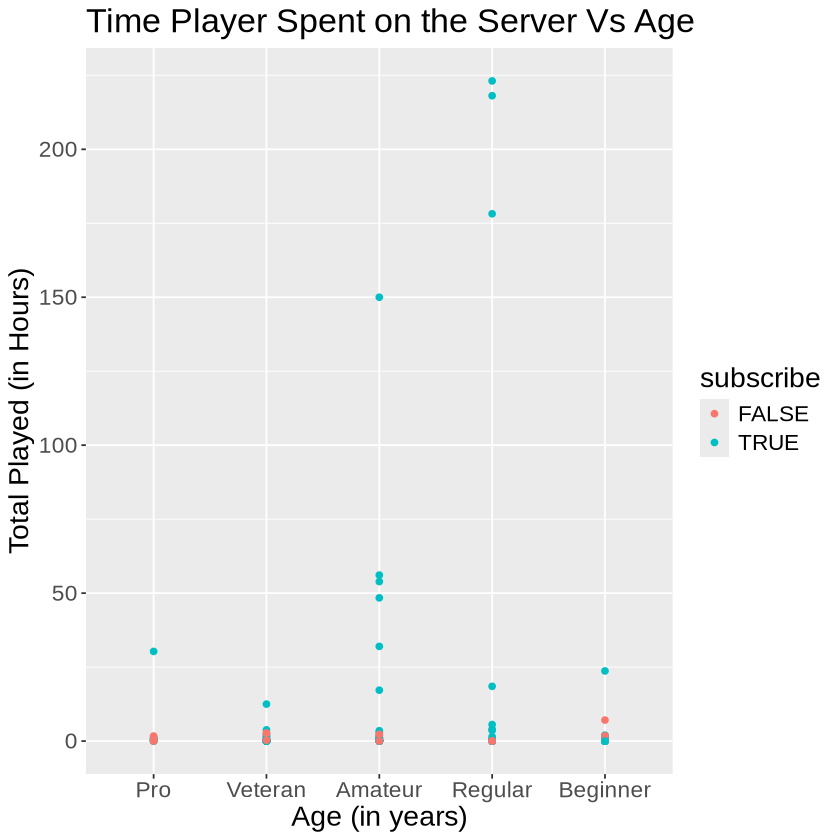

In [13]:
tidy_players <- players_url |>
                select(experience, subscribe, gender, Age, played_hours) |>
                mutate(experience = as_factor(experience)) |>
                mutate(gender = as_factor(gender)) |>
                filter(!is.na(Age))

plot1 <- tidy_players |>
         ggplot(aes (x = Age, y = played_hours, fill = gender)) +
         geom_bar(stat = "identity") +
         labs (x = "Age (in years)", y = "Total Played (in Hours)", fill = "gender", 
              title = "Time Player Spent on the Server Vs Age") + 
         theme (text = element_text (size = 17))

plot2 <- tidy_players |>
        ggplot(aes (x = experience, y = played_hours, color = subscribe)) +
        geom_point() +
        labs (x = "Age (in years)", y = "Total Played (in Hours)", color = "subscribe", 
              title = "Time Player Spent on the Server Vs Age") + 
        theme (text = element_text (size = 17))

plot1
plot2

1. Age vs Total Played Hours (bar plot)
   - Shows total hours played by the players across different ages.
   - The fill color represent the genders.
   - It highlight trends by age and gender differences.
2. Age vs Total Played Hours (scatter plot)
   - Shows the relationship between the player's experience and the total hours they play.
   - The color indicate subscription status, highlight the difference between the subscribed and non-subscribed playes.

# (4) Methode and Plan

For this project I will use the linear regression model. I will do this by predicting the played_hours as a continuous response variable based on four predictors.
### Assumptions

1. Observations are independent towards each other.
2. Assumes a linear relationship between the predictors and the response variable. 

### Limitation or Weakness

1. Highly correlated predictor variables (age and experience) could make the interpretation more challenging. 
2. If the relationship is not linear, the model might underperform
3. The extreme values in played_hours might misinterpret the model (make it bias).

### Model Selectiion, Comparison, and Data Processing

1. First, I will split the data into training and testing by 75/25.
2. Then, cross-validation would detect the overfitting and underfitting.
3. After that, I will calculate the RMSPE.
4. I will train the final model on the full training data with the selected parameters.
5. Test the final model to validate performance.